# importation de librairie 

In [884]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score 
from sklearn.metrics import recall_score
from  sklearn.metrics import precision_score
import warnings 
warnings.filterwarnings("ignore")

In [885]:
data = pd.read_csv('LoanApprovalPrediction.csv')

In [886]:
data.shape

(598, 13)

In [887]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [888]:
data['Loan_Status'].value_counts()

Loan_Status
Y    411
N    187
Name: count, dtype: int64

In [889]:
data['Married'].value_counts()

Married
Yes    388
No     210
Name: count, dtype: int64

In [890]:
data['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [891]:
data['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [892]:
data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

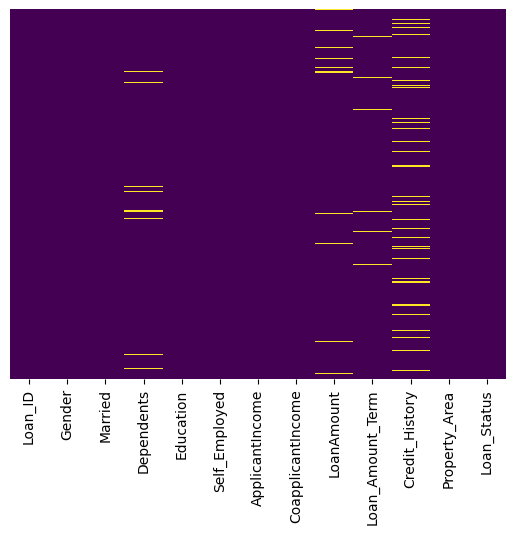

In [893]:
sns.heatmap(data.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [894]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         586 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         577 non-null    float64
 9   Loan_Amount_Term   584 non-null    float64
 10  Credit_History     549 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 60.9+ KB


In [895]:
data['Dependents'].fillna(data['Dependents'].mean(), inplace=True)
data['LoanAmount'].fillna(data['LoanAmount'].mean(), inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean(), inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mean(), inplace=True)

In [896]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<Axes: >

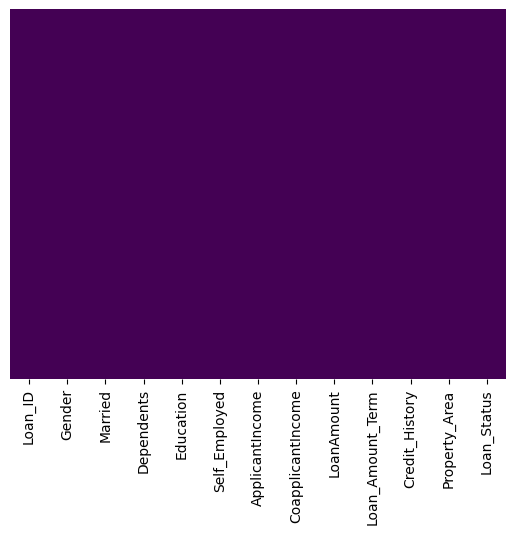

In [897]:
sns.heatmap(data.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [898]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,144.968804,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
594,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
595,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
596,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [899]:
data['Gender']=np.where(data['Gender']=='Male',1,0)
data['Married']=np.where(data['Married']=='Yes',1,0)
data['Education']=np.where(data['Education']=='Graduate',1,0)
data['Self_Employed']=np.where(data['Self_Employed']=='Yes',1,0)
data['Loan_Status'] = np.where(data['Loan_Status'] =='Y',1,0)
data['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [900]:
property_area_mapping= { 'Urban':0, 'Rural':1, 'Semiurban':2}
data['Property_Area'] = data['Property_Area'].map(property_area_mapping)

In [901]:
X = data.drop(['Loan_Status','Loan_ID'], axis=1)
Y = data['Loan_Status']
X.shape , Y.shape

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.4, random_state=1)
print("X_train: ", X_train.shape)
print("X_test:",X_test.shape)
print("y_train:", Y_train.shape)
print("y_test:",Y_test.shape)

X_train:  (358, 11)
X_test: (240, 11)
y_train: (358,)
y_test: (240,)


In [902]:
lr_model = LogisticRegression()

In [903]:
lr_model.fit(X_train,Y_train)

LogisticRegression()

In [904]:
y_predict = lr_model.predict(X_test)
y_predict

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [905]:
print("Accurancy de la regression logistique :", 100 * metrics.accuracy_score(Y_test,y_predict))
print("MSE de la  Regression logistique:",mean_squared_error(Y_test,y_predict))

Accurancy de la regression logistique : 81.66666666666667
MSE de la  Regression logistique: 0.18333333333333332


[[False False]
 [False False]]


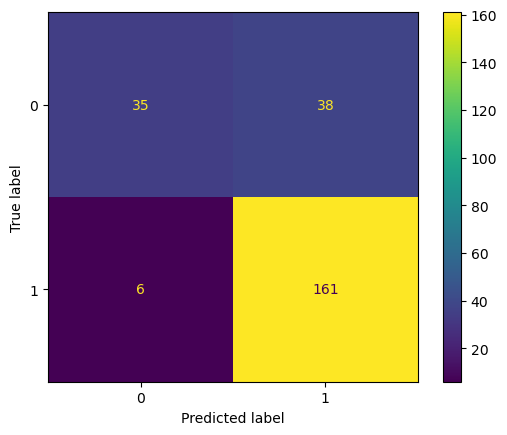

In [906]:
print(confusion_matrix(Y_test,y_predict) == ConfusionMatrixDisplay.from_estimator(lr_model, X_test,Y_test))

[[False False]
 [False False]]


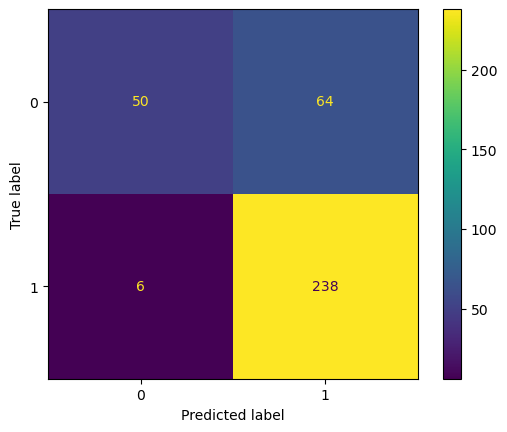

In [907]:
print(confusion_matrix(Y_train,Y_train) == ConfusionMatrixDisplay.from_estimator(lr_model, X_train, Y_train))

In [908]:
print("Precision Score de la Regression logistique:", precision_score(Y_test,y_predict))
print("Recall Score de la regression logistique:", recall_score(Y_test,y_predict))
print("F1-Score de la regression logistique :", f1_score(Y_test,y_predict))

Precision Score de la Regression logistique: 0.8090452261306532
Recall Score de la regression logistique: 0.9640718562874252
F1-Score de la regression logistique : 0.8797814207650273
